In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pickle
import model
import kinetic_energy_functional as Ekf
import quantum

model tests:

In [12]:
reload(model)

<module 'model' from '/Users/hongbinren/Documents/program/1D/model.py'>

...processing data
train/test data saved...
...model training
model testing err: 0.0016


/Users/hongbinren/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/Users/hongbinren/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


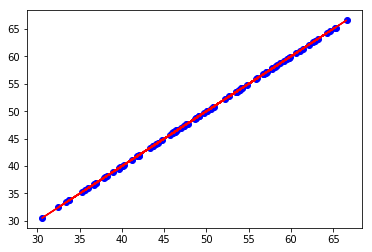

In [13]:
fname = 'densG_T_dT'
gamma = 0.1
C_ = 1e-4
KRR = model.model(fname, gamma, C_)
with open('test_data', 'rb') as f:
    test_data = pickle.load(f)
test_dens, test_Ek, test_dEk = test_data[:, :51], test_data[:, 51], test_data[:, 52:]
pred_Ek = KRR.predict(test_dens)
plt.plot(test_Ek, pred_Ek, 'bo')
plt.plot(test_Ek, test_Ek, 'r')
plt.show()

Functional test:

In [15]:
from sklearn.metrics import mean_squared_error as mse 

In [37]:
reload(Ekf)

<module 'kinetic_energy_functional' from '/Users/hongbinren/Documents/program/1D/kinetic_energy_functional.py'>

In [23]:
Xi = KRR.X_fit_.T
alpha0 = KRR.dual_coef_

pred_Ek0 = Ekf.kinetic_dens(test_dens, alpha0, Xi, gamma)
err0 = mse(test_Ek, pred_Ek0)

pred_Ek1 = Ekf.kinetic_alpha(alpha0, test_dens, Xi, gamma)
err1 = mse(test_Ek, pred_Ek1)

print(err0)
print(err1)

(0.001648058589719159+0j)
(0.001648058589719159+0j)


In [34]:
from scipy.optimize import approx_fprime

n, V0, dmu = 3, 20, 40
_, mu, _, _, densG = quantum.quantum(n, V0, dmu)

pred_dEk = Ekf.kinetic_deriv_dens(densG.reshape(1, -1), alpha0, Xi, gamma)
approx_dEk = approx_fprime(densG, Ekf.kinetic_dens, 1e-6, alpha0, Xi, gamma)
print(pred_dEk - approx_dEk)

[[-1.50990935e-05 -6.59233365e-06 -5.10306179e-06 -2.97435828e-06
   7.77057025e-07 -3.59982018e-06 -1.42422273e-06 -1.89169920e-06
   1.37950244e-06  2.16767456e-06 -3.82855168e-07 -2.97542374e-06
  -3.59758675e-06  9.92344111e-07 -1.09893795e-06  6.84704952e-07
   7.32750365e-07  9.18583063e-07 -6.49216036e-07 -4.65563433e-07
   1.21810272e-07 -1.18165452e-07 -2.21825232e-06  7.67200522e-07
   9.35376288e-07 -8.97670901e-08 -2.36350384e-06  1.84487099e-06
   7.67200522e-07 -8.54010263e-07 -2.39190221e-06  1.03130497e-06
  -4.65563433e-07  1.16977337e-06  4.63835713e-07  2.78003014e-07
  -2.24789750e-07 -1.09893795e-06  8.28494094e-08  1.40463411e-06
   2.93629182e-06 -1.74709722e-06  8.03432503e-07  4.70007743e-07
  -1.43695185e-06 -2.33371743e-06 -3.59982018e-06 -3.31566913e-06
   1.11836788e-06 -4.64831444e-06 -7.50182835e-06]]


In [41]:
pred_dEkda = Ekf.kinetic_deriv_alpha(densG.reshape(1, -1), Xi, gamma)
approx_dEkda = approx_fprime(alpha0, Ekf.kinetic_alpha, 1e-4, densG.reshape(1, -1), Xi, gamma)
print(pred_dEkda - approx_dEkda)

[[ 2.78627976e-09  2.26073293e-09 -1.39406109e-09  2.90748076e-09
   4.13254209e-10 -1.09419862e-09  7.81117282e-10 -5.48257584e-09
   3.74913045e-09  1.70700121e-10 -5.76258885e-09  5.71214820e-09
   2.82449381e-09  3.44583806e-10 -6.83297874e-09  6.47731202e-10
  -3.93914568e-10 -1.12033582e-09 -1.88260518e-12  6.32597574e-09
   3.41233841e-09 -1.47052592e-10 -1.77684845e-09 -6.78772183e-09
  -2.61215327e-10  2.21297847e-09 -3.98523814e-09  4.69312256e-10
  -2.08961071e-10  1.35639155e-09 -1.13077014e-09 -3.82987297e-09
   3.48855866e-09 -2.46322240e-09  2.28131058e-09  2.71145528e-09
   2.93391733e-09  2.61864364e-09  1.24325439e-10  2.51654919e-10
   6.64955091e-10  1.27803668e-09 -5.30585809e-09  1.28041067e-09
   2.97655689e-09  9.62428359e-10 -5.92626692e-09  5.31827316e-09
   4.07656642e-09 -2.41870557e-09  3.02935144e-09  8.17851498e-09
   1.82372228e-10  3.46328521e-11  1.57627811e-09 -1.95666805e-09
   1.39737238e-09 -1.39169787e-09 -3.48717710e-09  1.63640401e-09
  -6.10571

Loss function:

In [44]:
import optimization as opt

In [47]:
reload(opt)

<module 'optimization' from '/Users/hongbinren/Documents/program/1D/optimization.py'>

In [48]:
with open('train_data', 'rb') as f1:
    train_data = pickle.load(f1)
train_dens, train_Ek, train_dEk = train_data[:, :51], train_data[:, 51], train_data[:, 52:]

c = 1
loss = opt.loss(alpha0, c, gamma, Xi, train_dens, train_Ek, train_dEk)
print(loss)

2496.7779902461


In [50]:
dloss = opt.loss_deriv(alpha0, c, gamma, Xi, train_dens, train_Ek, train_dEk)
dloss_approx = approx_fprime(alpha0, opt.loss, 1e-6, c, gamma, Xi, train_dens, train_Ek, train_dEk)
print(dloss - dloss_approx)

[-2.89779136e-04 -3.14516190e-04 -2.51422402e-04 -1.74500576e-04
 -2.77035904e-04 -3.77089577e-04 -2.17389443e-04 -4.54586919e-04
 -4.71171015e-04 -5.59817672e-04 -3.20157266e-04 -3.90028920e-04
 -1.56138904e-04 -2.05273758e-04 -1.56232974e-04 -2.92842195e-04
 -1.97079730e-04 -3.38879128e-04 -4.74041277e-04 -1.60460980e-04
 -2.60793967e-04 -1.88526861e-04 -4.30179353e-04 -1.22864815e-04
 -1.27218378e-04 -3.88777380e-04 -1.71532220e-04 -4.05609517e-04
 -1.96191914e-04 -1.89385437e-04 -3.39779416e-04 -5.03156792e-04
 -2.91013275e-04 -3.87622772e-04 -2.02373085e-04 -4.40851576e-04
 -4.94866756e-04 -2.92648656e-04 -4.33314184e-04 -3.84751645e-04
 -9.89022050e-05 -4.96447869e-04 -2.58731937e-04 -4.83930663e-04
 -2.99669140e-04 -2.16077503e-04 -4.27417020e-04 -3.15110485e-04
 -1.91578764e-04 -2.41421362e-04 -1.38057360e-04 -1.94546585e-04
 -3.26497843e-04 -5.01892479e-04 -2.53825989e-04 -4.60854025e-04
 -9.35837757e-05 -4.51447239e-04 -1.56204886e-04 -2.62948760e-04
 -1.27973830e-04 -1.79929

quantum:

In [72]:
reload(quantum)

<module 'quantum' from '/Users/hongbinren/Documents/program/1D/quantum.py'>

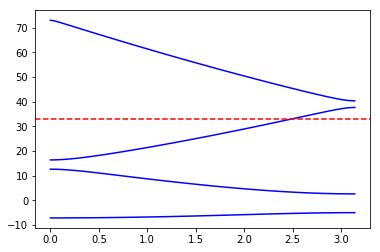

In [73]:
n, V0, dmu = 3, 20, 40
Ek, mu, en_band, Vq, densG = quantum.quantum(n, V0, dmu)
En = en_band.T
K = np.linspace(0, np.pi, 81)
for i in range(4):
    plt.plot(K, En[i], 'b')
plt.axhline(xmin=0, xmax=np.pi, y=mu, color='r', linestyle='--')
plt.show()

In [74]:
Ek

36.02735485743796

In [75]:
densG[0]

2.7777777777777777

derivative accuracy:

In [88]:
with open('optimAlpha', 'rb') as f2:
    alpha_optim = pickle.load(f2)

pred_dEk0 = Ekf.kinetic_deriv_dens(test_dens, alpha0, Xi, gamma)
df_err0 = np.linalg.norm((pred_dEk0 - test_dEk), axis=1)**2

pred_dEk1 = Ekf.kinetic_deriv_dens(test_dens, alpha_optim, Xi, gamma)
df_err1 = np.linalg.norm((pred_dEk1 - test_dEk), axis=1)**2

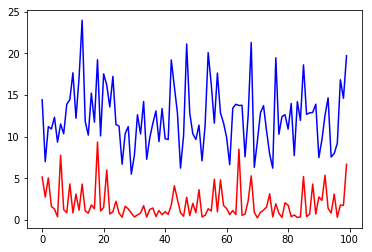

In [89]:
plt.plot(range(100), df_err0, 'b')
plt.plot(range(100), df_err1, 'r')
plt.show()

In [90]:
pred_Ek0 = Ekf.kinetic_dens(test_dens, alpha0, Xi, gamma)
f_err0 = mse(test_Ek, pred_Ek0)

pred_Ek1 = Ekf.kinetic_dens(test_dens, alpha_optim, Xi, gamma)
f_err1 = mse(test_Ek, pred_Ek1)

print(f_err0)
print(f_err1)

(0.001648058589719159+0j)
(0.0023593714707410385+0j)
